In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, f1_score,precision_score
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression


In [2]:
mail_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/mail_data.csv')

In [3]:
mail_df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


##**1. Data Cleaning**

In [4]:
mail_df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
mail_df.shape

(5572, 2)

In [6]:
mail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
mail_df.isnull().sum()

Category    0
Message     0
dtype: int64

In [8]:
mail_df.duplicated().sum()

415

In [9]:
# remove duplicates
mail_df = mail_df.drop_duplicates(keep='first')

In [10]:
mail_df.duplicated().sum()

0

In [11]:
mail_df.shape

(5157, 2)

##**2.EDA**

In [12]:
mail_df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
mail_df.rename(columns={'Category': 'Target'},inplace=True)

<ipython-input-13-c5852f038cc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mail_df.rename(columns={'Category': 'Target'},inplace=True)


In [14]:
mail_df.head()

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
mail_df.groupby('Target').describe()

Message                                                               
         count unique                                                top freq
Target                                                                       
ham       4516   4516  Go until jurong point, crazy.. Available only ...    1
spam       641    641  Free entry in 2 a wkly comp to win FA Cup fina...    1

In [16]:
value_counts=mail_df['Target'].value_counts()
value_counts

ham     4516
spam     641
Name: Target, dtype: int64

Text(0.5, 1.0, 'Bar plot of mail')

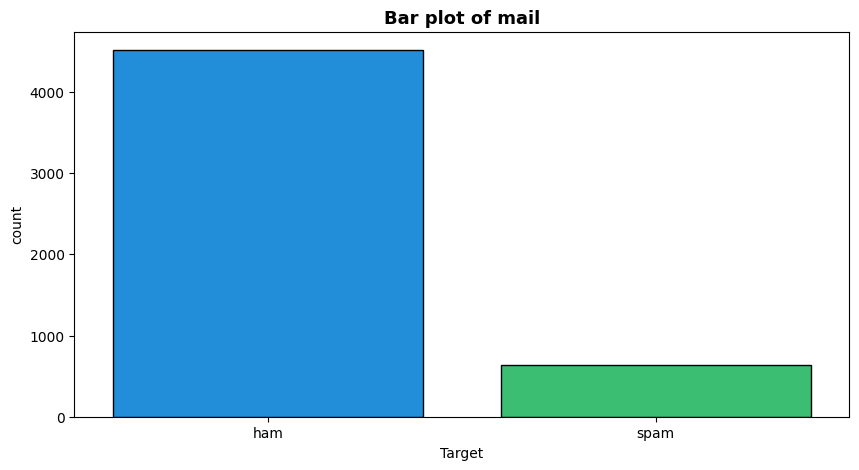

In [17]:
plt.figure(figsize=(10,5))     # setting figure size
sns.set_palette('terrain')      # setting color
sns.countplot(x='Target',data=mail_df,edgecolor='black')

plt.title('Bar plot of mail',fontsize = 13, fontweight='bold')    # setting title


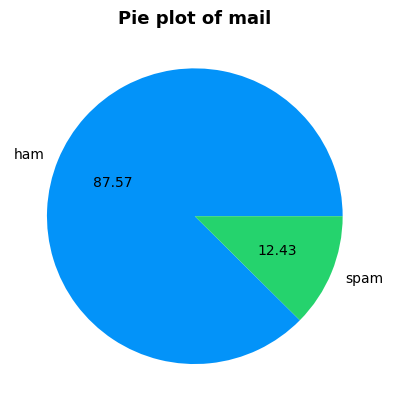

In [18]:
plt.pie(mail_df['Target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")

plt.title('Pie plot of mail',fontsize = 13, fontweight='bold')    # setting title
plt.show()

In [19]:
mail_df['Target']=mail_df['Target'].apply(lambda x : 0 if x=='ham' else 1  )

<ipython-input-19-bc2b85a0789a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mail_df['Target']=mail_df['Target'].apply(lambda x : 0 if x=='ham' else 1  )


In [20]:
mail_df.head()

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
mail_df['length']= mail_df['Message'].apply(len)


<ipython-input-21-901db405f2b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mail_df['length']= mail_df['Message'].apply(len)


In [22]:
mail_df.head()

,Target,Message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
mail_df['Message'][50]

'What you thinked about me. First time you saw me in class.'

<Axes: xlabel='length', ylabel='Count'>

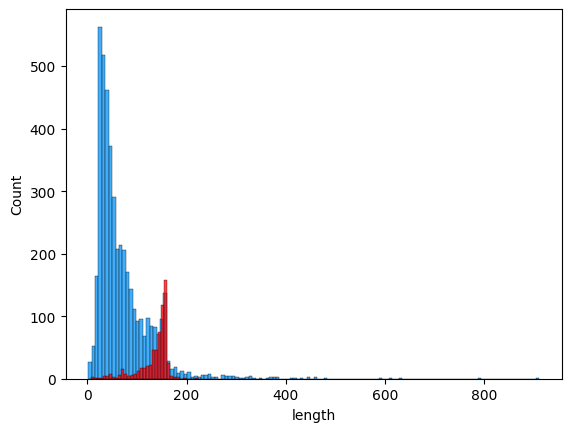

In [24]:
sns.histplot(mail_df[mail_df['Target']==0]['length'])
sns.histplot(mail_df[mail_df['Target']==1]['length'],color='red')

<ipython-input-25-108fd58076c8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mail_df.corr(),annot=True)


<Axes: >

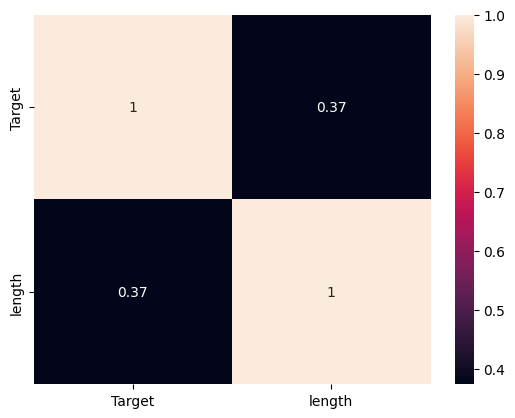

In [25]:

sns.heatmap(mail_df.corr(),annot=True)

##**3. Data Preprocessing**
Lower case

Tokenization

Removing special characters

Removing stop words and punctuation

Stemming

In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
import string
from nltk.corpus import stopwords

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [29]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('crying')

'cri'

In [30]:
# Let's create a function which will do our data preprocessing
def transform_text(text):
  text=text.lower()     # This will convert our msg in a lower case
  text=nltk.word_tokenize(text)       # Tokenising the each words
# Now let's create a list  y which will remove all the  special characters
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
# Copy the y-list to our text variable
  text=y[:]
  y.clear()
# We will now remove stopwords & punctuation
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
# Copy the y-list to our text variable
  text=y[:]
  y.clear()
# Stemming
  for i in text:
    y.append(ps.stem(i))


  return " ".join(y)



In [31]:
# Let's apply the function which we created on any one of the msg
transform_text('What you thinked about me. First time you saw me in class.')

'think first time saw class'

In [32]:
mail_df['Message'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                              ü b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Message, Length: 5157, dtype: object

In [33]:
mail_df['transformed_msg'] = mail_df['Message'].apply(transform_text)

<ipython-input-33-e1564975aac9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mail_df['transformed_msg'] = mail_df['Message'].apply(transform_text)


In [34]:
mail_df.head()

,Target,Message,length,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


###**Word Cloud**

We will use world cloud that is an inbuilt library in python to get the mosst repeattaive words in ham and spam msgs.

In [35]:
from wordcloud import WordCloud
wc = WordCloud(height= 500, width = 500, min_font_size=10, background_color='black')

In [36]:
spam_wc = wc.generate(mail_df[mail_df['Target']==1]['transformed_msg'].str.cat(sep=" "))

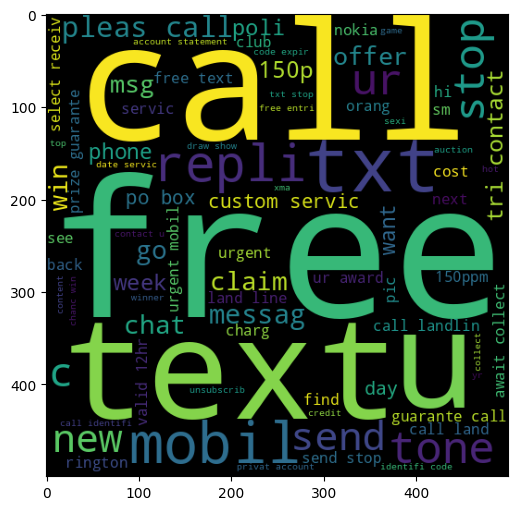

In [37]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [38]:
from wordcloud import WordCloud
wc = WordCloud(height= 500, width = 500, min_font_size=10, background_color='black')

In [39]:
ham_wc = wc.generate(mail_df[mail_df['Target']==0]['transformed_msg'].str.cat(sep=" "))

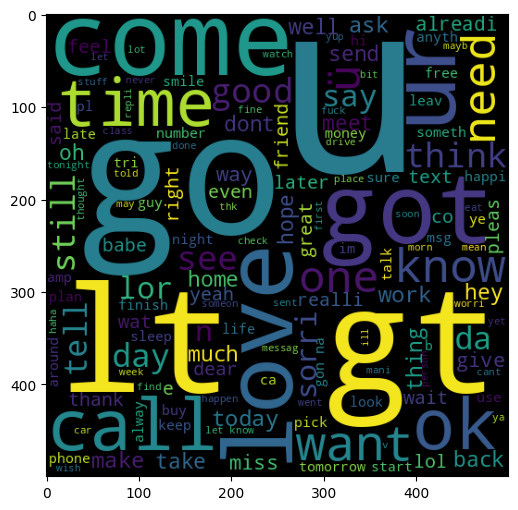

In [40]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

We will now see the most repeatative words in our spam and ham msg.

In [41]:
# Let's get the number of words in spam msg
spam_corpus=[]
for msg in mail_df[mail_df['Target']==1]['transformed_msg'].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [42]:
len(spam_corpus)

9781

We see that in total there are 9781 total words inn spam msg

In [ ]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(50)).rename(columns={0:'words',1:'repeatation'})

These are 50 most repeatative words in our spam msg.

In [44]:
# Similary now let's get the number of words in ham msg
ham_corpus=[]
for msg in mail_df[mail_df['Target']==0]['transformed_msg'].tolist():
  for word in msg.split():
    ham_corpus.append(word)


In [45]:
len(ham_corpus)

35940

We see that in total there are 35940 total words inn ham msg

In [ ]:
pd.DataFrame(Counter(ham_corpus).most_common(50)).rename(columns={0:'words',1:'repeatation'})

These are 50 most repeatative words in our ham msg.

Now our model is ready for model implementation.

##4. **Model Building**

We are going to impement the following models in our dataset:



1.   Naive Bayes - GaussianNB, MultinomialNB, BernoulliNB
2.  Decision Tree

1.   K Neighbors
2.   RandomForest

1.   Ada Boost
2.   Gradient Boosting

1.    X G Boost










In [47]:
cv=CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [48]:
X = tfidf.fit_transform(mail_df['transformed_msg']).toarray()

In [49]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
X.shape

(5157, 3000)

In [51]:
y=mail_df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=3,stratify=mail_df['Target'])

In [53]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [54]:
# Let's fit the data in GaussianNB
gnb.fit(X_train, y_train)
y_predict_gnb=gnb.predict(X_test)
# Accuracy score
print(accuracy_score(y_test, y_predict_gnb))
#Confusion matrix
print(confusion_matrix(y_test, y_predict_gnb))
# precision score
print(precision_score(y_test, y_predict_gnb))

0.8594961240310077
[[780 124]
 [ 21 107]]
0.46320346320346323


In [55]:
# Let's fit the data in MultinomialNB
mnb.fit(X_train,y_train)
y_predict_mnb=mnb.predict(X_test)
# Accuracy score
print(accuracy_score(y_test, y_predict_mnb))
#Confusion matrix
print(confusion_matrix(y_test, y_predict_mnb))
# precision score
print(precision_score(y_test, y_predict_mnb))

0.9786821705426356
[[904   0]
 [ 22 106]]
1.0


In [56]:
# Let's fit the data in BernoulliNB
bnb.fit(X_train,y_train)
y_predict_bnb=bnb.predict(X_test)
# Accuracy score
print(accuracy_score(y_test, y_predict_bnb))
#Confusion matrix
print(confusion_matrix(y_test, y_predict_bnb))
# precision score
print(precision_score(y_test, y_predict_bnb))

0.9777131782945736
[[901   3]
 [ 20 108]]
0.972972972972973


As our data is highly imbalnced, precission score matters the most. So, we will consider MultinomialNB as it provideds 0 FP value and TFID vectorizer performing better than CountVectorizer.

In [57]:
# Let's import fewmore model which we are gonna implement in our dataset.
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [58]:
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [59]:
clfs = {
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [60]:
def train_classifier(clf,X_train,y_train,X_test,Y_test):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)

  return accuracy,precision

In [61]:
train_classifier(dtc,X_train,y_train,X_test,y_test)

(0.937015503875969, 0.8058252427184466)

In [63]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)

  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  NB
Accuracy -  0.9786821705426356
Precision -  1.0
For  DT
Accuracy -  0.936046511627907
Precision -  0.7924528301886793
For  LR
Accuracy -  0.9496124031007752
Precision -  0.8877551020408163
For  RF
Accuracy -  0.9728682170542635
Precision -  0.9716981132075472
For  AdaBoost
Accuracy -  0.9612403100775194
Precision -  0.8928571428571429
For  GBDT
Accuracy -  0.9544573643410853
Precision -  0.9354838709677419
For  xgb
Accuracy -  0.9699612403100775
Precision -  0.9369369369369369


In [67]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
0,NB,0.978682,1.000000
3,RF,0.972868,0.971698
6,xgb,0.969961,0.936937
5,GBDT,0.954457,0.935484
4,AdaBoost,0.961240,0.892857
2,LR,0.949612,0.887755
1,DT,0.936047,0.792453


In [68]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.978682
1,RF,Accuracy,0.972868
2,xgb,Accuracy,0.969961
3,GBDT,Accuracy,0.954457
4,AdaBoost,Accuracy,0.961240
5,LR,Accuracy,0.949612
6,DT,Accuracy,0.936047
7,NB,Precision,1.000000
8,RF,Precision,0.971698
9,xgb,Precision,0.936937


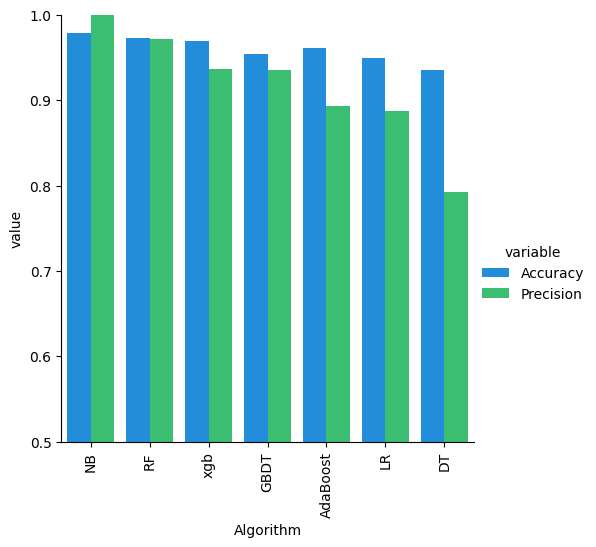

In [69]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

As we can see the best performing model is Naive Bayes model with the precision score of 100% and accuracy score as 97.86%. Thus we choose Naive Bayes for the spam detection prediction.